<a href="https://colab.research.google.com/github/Marat-BY/MLProjectsRep/blob/master/KeywordsAnalytics_KeywordsModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Импортируемые бибилиотеки и модули. Не трогать.**

In [1]:
# Уставнавливаем дополнительные модули и пакету через Python Index Package (PIP)
!pip install advertools
!pip install emot

# Подключаемые модули и библиотеки для обработки 
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import requests
import nltk
import math
import time
import os

# Для моделирования и настройки нейронной сети 
from keras.utils import np_utils
from keras.initializers import RandomNormal
from keras.initializers import he_normal
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

# Для работы с парсингом и токенизированию слов
from io import BytesIO
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Для обработки текстовых данных
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.sparse import hstack
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import ModelCheckpoint

# Использование фреймворка TensorFlow для обработки текстовых данных
import tensorflow as tf
import tensorflow_hub as hub

# Визуализация данных и предупреждения
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(style = "tableau-colorblind10")
plt.rcParams['figure.figsize'] = (15, 10)
%matplotlib inline
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot , plot
init_notebook_mode(connected = True)

# Библиотека advertools для работы с рекламой и ключевыми словами
# https://pypi.org/project/advertools/
# https://advertools.readthedocs.io/en/master/advertools.html#module-advertools.serp
# https://pypi.org/project/textgenrnn/
import advertools as adv

# Прочее
import warnings
warnings.filterwarnings("ignore")
from google.colab import files

     |████████████████████████████████| 245kB 1.7MB/s 
     |████████████████████████████████| 245kB 5.2MB/s 
     |████████████████████████████████| 3.2MB 6.8MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 3.1MB 18.5MB/s 
     |████████████████████████████████| 235kB 35.2MB/s 
     |████████████████████████████████| 2.7MB 28.0MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
  Created wheel for protego: filename=Protego-0.1.16-cp36-none-any.whl size=7765 sha256=716a61dcc00ec15a47ce3c073abb5bbf53e5687ff9671b971593a90aa5d5432d
  Stored in directory: /root/.cache/pip/wheels/51/01/d1/4a2286a976dccd025ba679acacfe37320540df0f2283ecab12
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-cp36-none-any.whl size=11515 sha256=1fe7a7ec3fceee797aaedc29f2cdf509a83106cd03b3671d6e9b0378fb844953
  Stored in directory: /root/.cache/pip/wheels/88/99/96/cfef6665f9cb1522ee6757ae5955feedf2fe25f1737f91fa7f
Successfully built protego Py

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


> Если вдруг обновится какой-либо из модулей и/или данный **код будет запускаться у другого пользователя**, то потребуется обновление/установка модулей/фреймворков, так как **Google Colab не обновляет модули в автоматическом режиме**. Используем следующее, в **строчку кода вводим режим обновления/установки:**
---
```
# Python >= 3.6.6
!pip install <название_модуля>
```



### **Загружаем данные с Google Drive для работы с ними.**

> Для того, чтобы работать в данном облаке необходимо чтобы в личном аккаунте Google Drive была папка с данным проектом. Внутри папки располагаем дополнительную папку с набором данным для последующего использования. С запуском кода ниже, потребуется ввести креды для своего аккаунта, где находятся данные файлы. 
---
Папка на диске должна выглядеть следующим образом:
https://prnt.sc/td9v11


In [2]:
# На данном этапе потребуется авторизация аккаунта и Google SDK для работы
# Запускаем код ниже и авторизуемся и вводим в строку Credentials код присланный Google
!pip install -U -q PyDrive

In [3]:
# Код для загрузки данных с диска Google для работы с ними в текущем окружении.
# Прежде требуется установить модуль !pip install -U -q PyDrive (уже установлен).
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Авторизация и создание клиента
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive()

In [4]:
# Загрузка файлов через Google SDK
# Необходимо иметь данные на локальном диске и при нажатии кнопки загрузить выбрать их всех для загрузки
# Начнется процесс загрузки данных в облако для работы, далее их еще необходимо будет сохранить в разные перменные среды.
from google.colab import files
uploaded = files.upload()

Saving Adwords_keywords.csv to Adwords_keywords.csv
Saving Ahrefs_keywords.csv to Ahrefs_keywords.csv
Saving CompetitorsUS_keywords.csv to CompetitorsUS_keywords.csv
Saving GSC_keywords.csv to GSC_keywords.csv


In [5]:
# Загружаем все данные в разные переменные среды для работы с ними
adwords_data = pd.read_csv(BytesIO(uploaded['Adwords_keywords.csv']))
ahrefs_data = pd.read_csv(BytesIO(uploaded['Ahrefs_keywords.csv']))
gsc_data = pd.read_csv(BytesIO(uploaded['GSC_keywords.csv']))
competitorUS_data = pd.read_csv(BytesIO(uploaded['CompetitorsUS_keywords.csv']))

### **Работа с данными. Очистка.**

In [6]:
# Информация про размерность данных
print(' adwords_data: {}\n ahrefs_data: {}\n gsc_data: {}\n competitorUSA_data: {}'.format(adwords_data.shape, ahrefs_data.shape, gsc_data.shape, competitorUS_data.shape), end = ' ')

 adwords_data: (21172, 3)
 ahrefs_data: (26543, 1)
 gsc_data: (384287, 3)
 competitorUSA_data: (144905, 1) 

In [7]:
# Информация о фичах в данных
print('Columns/Features info:\n {}\n {}\n {}\n {}\n'.format(adwords_data.columns, ahrefs_data.columns, gsc_data.columns, competitorUS_data.columns))

Columns/Features info:
 Index(['Matched search term', 'Impressions', 'Clicks'], dtype='object')
 Index(['women 4men in cookeville'], dtype='object')
 Index(['Search query', 'Impressions', 'Clicks'], dtype='object')
 Index(['interracial dating'], dtype='object')



In [8]:
# Сохраняем копии данных и избавляемся от ненужных признаков, оставляем только keyword sequence
# так как нам еще понадобятся признаки в основных таблицах - Impressions и Clicks для набора ключевых слов
adwords = adwords_data.copy(deep = False)
ahrefs = ahrefs_data.copy(deep = False)
gcs = gsc_data.copy(deep = False)
competitorUS = competitorUS_data.copy(deep = False)

In [9]:
# Если всё False значит это отдельные объекты, с которыми можно работать. Первоначальные объекты / таблицы не изменяться.
print(" Copy validation checking:\n Adwords: {}\n Ahrefs: {}\n GSC: {}\n Competitors: {}\n".format(
       adwords is adwords_data, ahrefs is ahrefs_data, gcs is gsc_data, competitorUS is competitorUS_data
))

 Copy validation checking:
 Adwords: False
 Ahrefs: False
 GSC: False
 Competitors: False



In [10]:
# Очистка данных Adwords
# Для работы с keywords необходимо удалить такие признаки в наборе как Impressions и Clicks
del(adwords['Impressions'])
del(adwords['Clicks'])
del(gcs['Clicks'])
del(gcs['Impressions'])

In [11]:
# Устанавливаем одинаковые имена для столбцов данных чтобы можно было работать с ними в последующем
# Если в таблице уже есть признак который надо переименовать используем метода dataset.rename(columns = {'old_name' : 'new_name'}, inplace = True)
# Если в таблице отсутствует название признакак и надо его добавить используем метод: dataset.columns = ['name_of_the_column']
adwords.rename(columns = {'Matched search term' : 'keywords'}, inplace = True)
ahrefs.columns = ['keywords']
gcs.rename(columns = {'Search query' : 'keywords'}, inplace = True)
competitorUS.columns = ['keywords']

In [12]:
# Информация о признаках в данных и изменились ли названия признаков
print('Columns/Features information:\n {}\n {}\n {}\n {}\n'.format(adwords.columns, ahrefs.columns, gcs.columns, competitorUS.columns))

Columns/Features information:
 Index(['keywords'], dtype='object')
 Index(['keywords'], dtype='object')
 Index(['keywords'], dtype='object')
 Index(['keywords'], dtype='object')



In [13]:
# Соединяем все данные, где у нас содержаться keywords -> [adwords + ahrefs + gcs]
# в единый набор данных для того чтобы провести анализ ключевых слов и их комбинаций
# используемый метод pd.concat(__массив_всех_данных__)
data_array = [adwords, ahrefs, gcs]
all_keywords = pd.concat(data_array)

In [14]:
# Проверяем какое количество записей в наборе данных
# Всего должно получиться записей 432 002
print("Всего в наборе данных содержится {} записи.".format(len(all_keywords)))

Всего в наборе данных содержится 432002 записи.


In [15]:
# Перевод всех данных в наборе в формат текста для того чтобы избежать ошибок связанных с типом данных
all_keywords['keywords'] = all_keywords['keywords'].astype(str)

In [16]:
# Проверка есть ли еще дополнительные типы данных в наборе
# Всё должно быть в формате типа данных object
all_keywords.dtypes

keywords    object
dtype: object

In [17]:
# Вычисляем максимальное и минимальное словосочетание (количество слов в keyword sequence)
print('Максимальное словосочетание в наборе keywords {} слов.'.format(all_keywords['keywords'].str.split().str.len().max()))
print('Минимальное словосочетание в наборе keywords {} слово.'.format(all_keywords['keywords'].str.split().str.len().min()))

Максимальное словосочетание в наборе keywords 45 слов.
Минимальное словосочетание в наборе keywords 1 слово.


In [18]:
# Проверка на наличие пропущенных значений если они будут то их необходимо будет удалить
all_keywords['keywords'].isnull().value_counts()

False    432002
Name: keywords, dtype: int64

In [19]:
# Для того чтобы работать дальше с текстом его необходимо немного преобразовать
# Первым делом переведем все слова находящиеся в колонке в нижний регистр
all_keywords['keywords'] = all_keywords['keywords'].str.lower()

In [20]:
# Если в наборе keywords присутствует пунктуация от нее тоже необходимо будет избавиться для последующей работы с текстом
all_keywords['keywords'] = all_keywords['keywords'].str.replace('[^\w\s]', '')

In [21]:
# В датасете существует большое количество смайликов (emoji) не представляющих никакой смысловой нагрузки для формирования keyword
# Необходимо будет удалить такие записи для того, чтобы провести текстовой анализ ключевых слов

import re     # библиотека регулярных выражений Python
import sys

# функция для удаления emoji из набора данных
def emoji(string):
  emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols and pictographs
                               u"\U0001F680-\U0001F6FF"  # transport and map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (for iOS)
                               u"\U00002500-\U00002BEF"  # chinese char (non ASCII characters)
                               u"\U00002702-\U000027B0"  
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags = re.UNICODE)
  return emoji_pattern.sub(r'', str(string))

In [22]:
# Теперь удаляем все смайлики и прочую non-ASCII текст в наборе данных
all_keywords['keywords'] = all_keywords['keywords'].apply(emoji)

In [23]:
# Так же в наборе данных после нашего преобразования присутствуют пустые значения, которые необходимо будет удалить
# Сначала проверка на наличие и действительно ли они существуют:
print('Количество пустых значений в наборе данных: {}'.format(len(all_keywords[all_keywords['keywords'] == ''])))

Количество пустых значений в наборе данных: 400


In [24]:
# Удаляем такие значения и получаем готовый набор данных с которым можно работать
all_keywords = all_keywords[all_keywords['keywords'] != '']

In [25]:
# Кроме того в наборе данных также необходимо удалить emoticons - выражения/подобия смайлов: :), )), xD и так далее
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

# Фунцкция для удаления эмотиконов
def remove_emoticons(text):
  emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
  return emoticon_pattern.sub(r'', text)

In [26]:
# Вызываем вышестоящую функцию для удаления эмотиконов
all_keywords['keywords'] = all_keywords['keywords'].apply(remove_emoticons)

In [27]:
# Кроме того в наборе данных присутствуют URL и адреса веб страниц, которые также необходимо будет удалить

# Функция для удаления адресов веб-страниц
def remove_urls(text):
  url_pattern = re.compile(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*')
  return url_pattern.sub(r'', text)

In [28]:
# Вызываем вышеуказанную функцию и удаляем адреса веб-сайтов
all_keywords['keywords'] = all_keywords['keywords'].apply(remove_urls)

In [29]:
# Избавляемся от цифр и символов в наборе
import string
all_keywords['keywords'] = all_keywords['keywords'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
all_keywords['keywords'] = all_keywords['keywords'].apply(lambda x: x.translate(str.maketrans('', '', '1234567890')))
all_keywords = all_keywords[all_keywords['keywords'] != ' ']
len(all_keywords)

431525

In [30]:
# фильтр строк на пустые символы
all_keywords['keywords'].str.replace(' ', '')
all_keywords.keywords = all_keywords.keywords.str.strip()

# избавляемся от пустых строк
all_keywords = all_keywords[all_keywords['keywords'] != '']

# смотрим на количество строк в наборе данных
len(all_keywords)

431264

In [31]:
# Так же удаляем Non-ASCII characters (другие языки кроме латиницы, если они есть в наборе данные)
def remove_nonASCII(text):
  nonASCII_pattern = re.compile(r"([^\x00-\x7F])+")
  return nonASCII_pattern.sub(r"", text)

In [32]:
# Плюс для того чтобы удалить NON-ASCII characters можно использовать модуль от разработчиков Facebook - fasstext 
! pip install fasttext

     |████████████████████████████████| 71kB 1.3MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3015478 sha256=c5da6326b74a43719ff9680c0fa4644ecfd1a4b922c78f145e74b84590669fe4
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [33]:
!wget -O /tmp/lid.176.bin https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

--2020-07-14 08:59:45--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘/tmp/lid.176.bin’

/tmp/lid.176.bin    100%[===================>] 125.18M  22.1MB/s    in 6.2s    

2020-07-14 08:59:52 (20.1 MB/s) - ‘/tmp/lid.176.bin’ saved [131266198/131266198]



In [34]:
#  Используем для простановки меток 
import contextlib
import fasttext

# Нейросеть которая распознаёт язык lid.176.bin
pretrained_model = '/tmp/lid.176.bin'
model = fasttext.load_model(pretrained_model)

# Распознавание языков
langs = []
for sentence in all_keywords['keywords']:
  lang = model.predict(sentence)[0]
  langs.append(str(lang)[11:13])

all_keywords['language'] = langs

In [35]:
# избавляемся от текста, который имеют языковую разметку != en
len(all_keywords[all_keywords['language'] != 'en'])

82033

In [36]:
# набор данных, который содержит в себе только английские слова
all_keywords = all_keywords[all_keywords['language'] == 'en']

In [37]:
all_keywords['language'].value_counts()

en    349231
Name: language, dtype: int64

In [38]:
del(all_keywords['language'])

### **Анализ ключевых слов в наборе данных**

In [39]:
# Набор данных 
all_keywords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349231 entries, 0 to 384278
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   keywords  349231 non-null  object
dtypes: object(1)
memory usage: 5.3+ MB


In [41]:
# Так как в наборе слишком много "лишних слов" таких как: a, the, and, in etc. от них необходимо избавиться так как смысловой нагрузки нет
# То есть опять приступаем к очистке данных в наборе keywords методом токенизирования
tokenized_sentences = all_keywords['keywords'].tolist()

In [42]:
# Тоже самое только надо воспроизвести отдельны "единичные слова" в наборе keywords в наборе данных
tokenized_words = all_keywords['keywords'].str.split(' ').explode().str.strip().tolist()

In [43]:
# Избавляемся от StopWords 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'have', 'them', 'her', 'was', 'if', 'about', 'over', 'just', 'she', "isn't", 'wasn', 'they', 'there', 'hadn', 'of', "shouldn't", 'for', "that'll", 'your', 'how', 'between', "should've", "don't", 's', 'll', "you'll", 'ma', 'needn', 'then', 'did', 'me', 'theirs', 'ours', 'below', 'having', "aren't", 'themselves', 'who', 'so', 'at', 'once', 'it', "wasn't", 'as', 'most', 'off', 'has', 'both', 'with', 'shouldn', 'his', 'but', "wouldn't", 'on', 'same', 'very', 'didn', 'am', 'after', 'why', 'this', 'doesn', 'you', 'can', 'its', 'such', "you've", 'an', "hasn't", "mightn't", 'which', 'will', 'ourselves', 'than', 't', "weren't", "mustn't", 've', 'now', 'until', 'against', 'some', 'their', 'do', 'above', 'not', 'should', 'where', 'the', 'yours', 'more', "hadn't", 'wouldn', 'yourselves', 'down', 'aren', 'further', 'shan', 'our', 'only', 'doing', "needn't", "haven't", 'when', 'while', 'in

In [44]:
# Необходимо добавить еще стоп слова, так как некоторые позиции отсутствуют в библиотеке
stop_words = {'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren',
              "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can',
              'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during',
              'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having',
              'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's",
              'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn',
              "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over',
              'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than',
              'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too',
              'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we', 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who',
              'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't", 'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself',
              'yourselves', 
              'in', 'for', 'а', 'how', 'the', 'of', 'xxx', 'XXX', 'com', ' com', 'com ', 'no', ' no', 'no ', 'me', ' me', 'me ',
              'is', ' is', 'is ', 'you', ' you', 'you ', 'are', ' are', 'are ', 'www', ' www', 'www ', 'the', ' the', 'the ', 'one ', 'one', ' one',
              'net', ' net', 'net ', 'by', ' by', 'by ', 'from ', ' from', ' he', 'he ', ' he ', 'her ', ' her', ' her ', 'it ', ' it', ' it ', ' as',
              'as ', ' as ', 'in ', ' in', ' in ', ' from ', 'to ', ' to', ' to ', 's', ' s', 's ', 'at', ' at', 'at ', 'on', 'on ', ' on'}

In [214]:
import nltk
nltk.download('punkt')

# Убираем стоп слова с предложений по ключевым словам
filtered_sentences = []
for sentence in tokenized_sentences:
    filtered_sentences.append(' '.join(word for word in nltk.word_tokenize(sentence) if word.lower() not in stop_words))

filtered_sentences = [word for word in filtered_sentences if word]


# Убираем стоп слова с предложений по ключевым предложениям
filtered_words = []
for sentence in tokenized_words:
    filtered_words.append(''.join(word for word in nltk.word_tokenize(sentence) if word.lower() not in stop_words))

filtered_words = [word for word in filtered_words if word]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [217]:
# Теперь рассмотрим частотность всех слов в нашем наборе
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize

freq_dist = FreqDist(filtered_words)
print(freq_dist)

<FreqDist with 48276 samples and 1034833 outcomes>


In [57]:
# # Stemming and Lemmatization
# from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
# from nltk.tokenize import sent_tokenize, word_tokenize

# # Создаем экземпляр класса для PorterStemmer
# ps = PorterStemmer()
# lst = LancasterStemmer()
# englishStemmer = SnowballStemmer('english', ignore_stopwords = True)

# # Filtered and stemmed words
# stemmed_filtered_words = []

# for w in filtered_words:
#   stemmed_filtered_words.append(englishStemmer.stem(w))

# print("Filtered Words: ", filtered_words[:20])
# print("Stemmed Filtered Words: ", stemmed_filtered_words[:20])

In [218]:
freq_dist.most_common(25)

[('dating', 56280),
 ('sex', 31085),
 ('girls', 23847),
 ('girl', 22224),
 ('women', 18534),
 ('call', 14973),
 ('men', 11591),
 ('sites', 11420),
 ('online', 11009),
 ('indian', 10772),
 ('gay', 10570),
 ('singles', 10337),
 ('number', 10179),
 ('kiss', 8918),
 ('free', 8678),
 ('aunty', 8498),
 ('site', 8416),
 ('single', 8246),
 ('date', 8211),
 ('love', 7697),
 ('man', 7514),
 ('woman', 7511),
 ('tamil', 6682),
 ('meet', 6618),
 ('chat', 6534)]

In [219]:
# Повторный расчет набора слов в keywords наборе данных
freq_dist = FreqDist(filtered_words)

# Расчет для частотности предложений (целых keywords) в наборе данных
freq_SentDist = FreqDist(filtered_sentences)

In [220]:
freq_SentDist.most_common(10)

[('kiss', 209),
 ('sex', 191),
 ('dating', 168),
 ('women seeking women', 102),
 ('dating sites', 99),
 ('women', 94),
 ('first kiss', 88),
 ('kiss first date', 87),
 ('know relationship', 79),
 ('love', 75)]

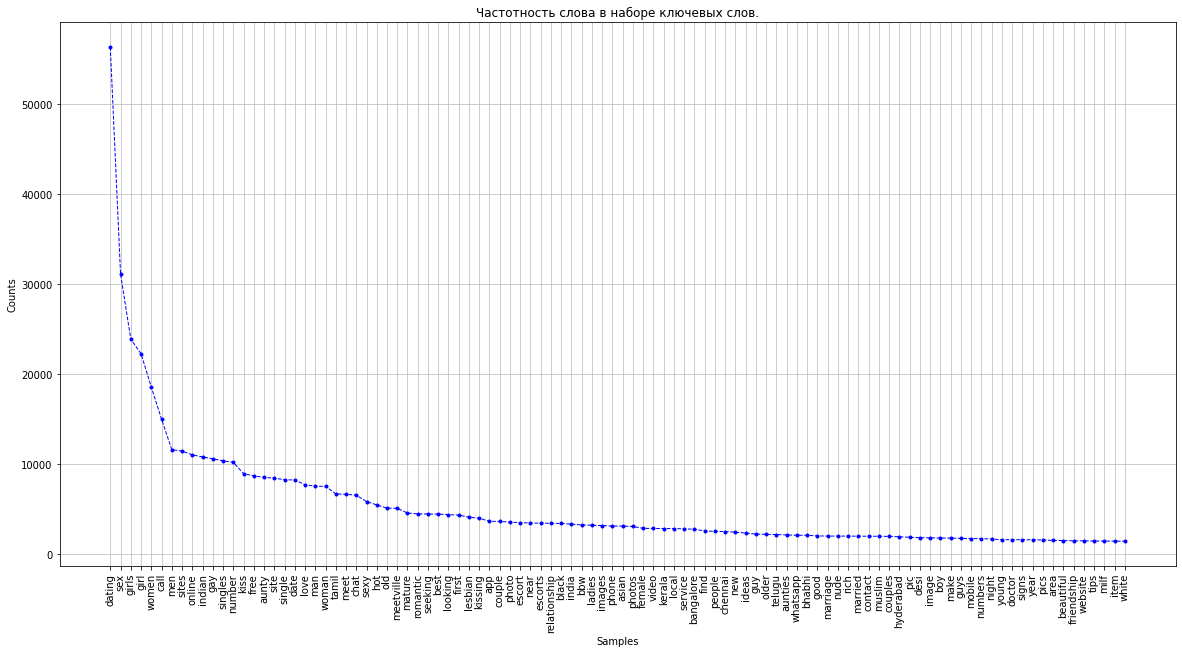

In [221]:
plt.figure(figsize = (20, 10))
plt.xlabel('Cлово в наборе данных')
plt.ylabel('Частота в наборе данных')
plt.title('Частотность слова в наборе ключевых слов.')
freq_dist.plot(100, cumulative = False, marker = 'o', linestyle = 'dashed', color = 'blue', linewidth = 1, markersize = 3, animated = True)
plt.show();

In [222]:
# Фильтр количества словосочетаний в наборе ключевых слов в наборе даных
def structure_keyword(tokenizedArray, lenght, emptyArray):
  for keyword in tokenizedArray:
    if len(keyword.split(' ')) == lenght:
      emptyArray.append(keyword)

In [223]:
# Создаем массивы для ключевых слов. Для 2, 3, 4 и 5 словосочетаний.
tokenized_twoWords = []
tokenized_threeWords = []
tokenized_fourWords = []
tokenized_fiveWords = []
tokenized_sixWords = []
tokenized_sevenWords = []
tokenized_eightWords = []
tokenized_nineWords = []
tokenized_tenWords = []

# Вызываем функцию для поиска и заполняем массив
structure_keyword(tokenized_sentences, 2, tokenized_twoWords)
structure_keyword(tokenized_sentences, 3, tokenized_threeWords)
structure_keyword(tokenized_sentences, 4, tokenized_fourWords)
structure_keyword(tokenized_sentences, 5, tokenized_fiveWords)
structure_keyword(tokenized_sentences, 6, tokenized_sixWords)
structure_keyword(tokenized_sentences, 7, tokenized_sevenWords)
structure_keyword(tokenized_sentences, 8, tokenized_eightWords)
structure_keyword(tokenized_sentences, 9, tokenized_nineWords)
structure_keyword(tokenized_sentences, 10, tokenized_tenWords)

In [224]:
print(' Объем каждого из массивов:\n 2 keywords: {}\n 3 keywords: {}\n 4 keywords: {}\n 5 keywords: {}\n 6 keywords: {}\n 7 keywords: {}\n 8 keywords: {}\n 9 keywords: {}\n 10 keywords: {}\n'.format(len(tokenized_twoWords),
                                                                                                                 len(tokenized_threeWords),
                                                                                                                 len(tokenized_fourWords),
                                                                                                                 len(tokenized_fiveWords),
                                                                                                                 len(tokenized_sixWords),
                                                                                                                 len(tokenized_sevenWords),
                                                                                                                 len(tokenized_eightWords),
                                                                                                                 len(tokenized_nineWords),
                                                                                                                 len(tokenized_tenWords)))

 Объем каждого из массивов:
 2 keywords: 71095
 3 keywords: 117824
 4 keywords: 80602
 5 keywords: 35065
 6 keywords: 15034
 7 keywords: 7125
 8 keywords: 3953
 9 keywords: 2138
 10 keywords: 1138



In [225]:
# Смотрим на частотность:
freqDist_oftwoWords = FreqDist(filtered_twoWords)
freqDist_ofthreeWords = FreqDist(filtered_threeWords)
freqDist_offourWords = FreqDist(filtered_fourWords)
freqDist_offiveWords = FreqDist(filtered_fiveWords)
freqDist_ofsixWords =  FreqDist(filtered_sixWords)


print(freqDist_oftwoWords)
print('==================')
print(freqDist_ofthreeWords)
print('==================')
print(freqDist_offourWords)
print('==================')
print(freqDist_offiveWords)
print('==================')
print(freqDist_ofsixWords)

<FreqDist with 66417 samples and 71095 outcomes>
<FreqDist with 109714 samples and 117824 outcomes>
<FreqDist with 74600 samples and 80602 outcomes>
<FreqDist with 32279 samples and 35065 outcomes>
<FreqDist with 13947 samples and 15034 outcomes>


In [226]:
freqDist_oftwoWords.most_common(10)

[('years old', 26),
 ('dating site', 23),
 ('dating sites', 22),
 ('tamil sex', 14),
 ('s women', 11),
 ('women age', 10),
 ('online dating', 9),
 ('single women', 9),
 ('singles over', 9),
 ('dating over', 9)]

In [227]:
freqDist_ofthreeWords.most_common(10)

[('women seeking women', 100),
 ('year old woman', 47),
 ('year old man', 34),
 ('years old woman', 33),
 ('year old women', 27),
 ('years old man', 26),
 ('years old women', 14),
 ('year old bbw', 13),
 ('and single man', 12),
 ('women seeking men', 11)]

In [69]:
freqDist_offourWords.most_common(10)

[('man  years old', 32),
 ('woman  years old', 28),
 ('women  years old', 25),
 ('year old black man', 20),
 ('year old indian woman', 19),
 ('year old black woman', 16),
 ('year old indian man', 16),
 ('year old single woman', 14),
 ('year old woman indian', 13),
 ('year old dating sites', 10)]

In [228]:
freqDist_offiveWords.most_common(10)

[('average  year old man', 35),
 ('single  year old woman', 17),
 ('average  year old woman', 10),
 ('dating  year old woman', 9),
 ('dating  year old man', 9),
 ('dating sites for seniors over', 7),
 ('year old man never married', 7),
 ('hot  year old man', 7),
 ('mature dating for over s', 6),
 ('free dating sites in india', 5)]

In [229]:
freqDist_ofsixWords.most_common(10)

[('dating sites for  year olds', 17),
 ('dating websites for  year olds', 9),
 ('good looking  year old man', 9),
 ('dating a  year old man', 8),
 ('dating site for  year olds', 5),
 ('women over  looking for men', 5),
 ('pictures of  year old woman', 5),
 ('signs he wants to date you', 4),
 ('where to meet single men over', 4),
 ('dos and donts of online dating', 4)]

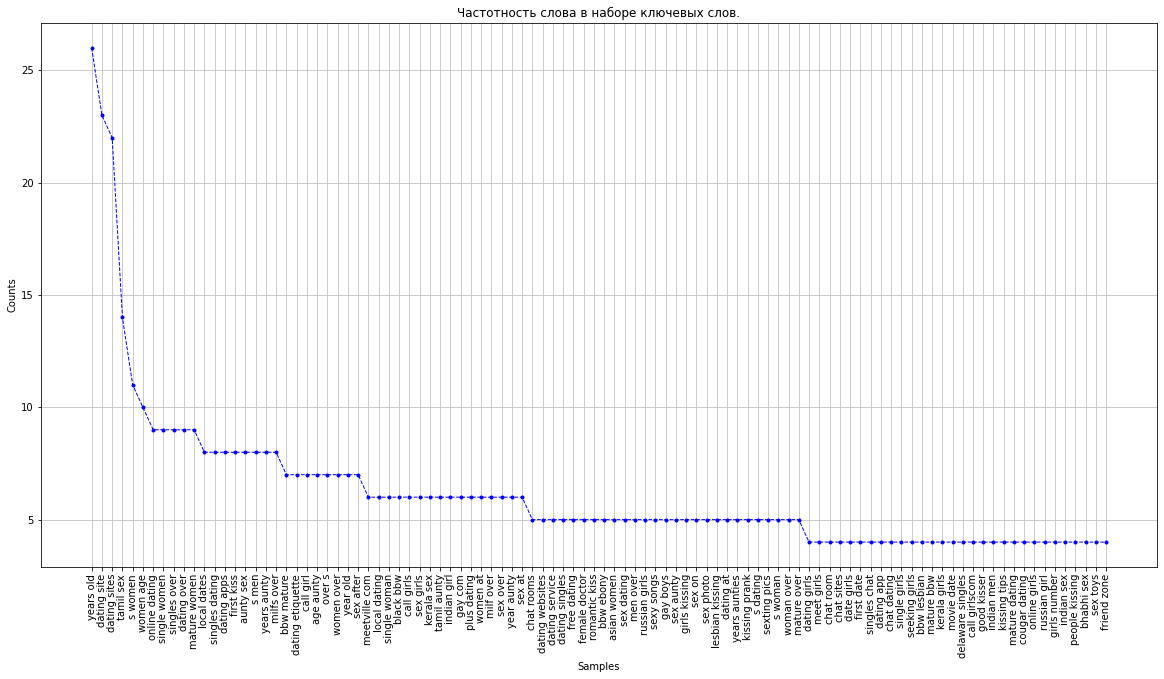

In [230]:
# Визуализация полученных результатов
plt.figure(figsize = (20, 10))
plt.xlabel('Cлово в наборе данных')
plt.ylabel('Частота в наборе данных')
plt.title('Частотность слова в наборе ключевых слов.')
freqDist_oftwoWords.plot(100, cumulative = False, marker = 'o', linestyle = 'dashed', color = 'blue', linewidth = 1, markersize = 3, animated = True)
plt.show();

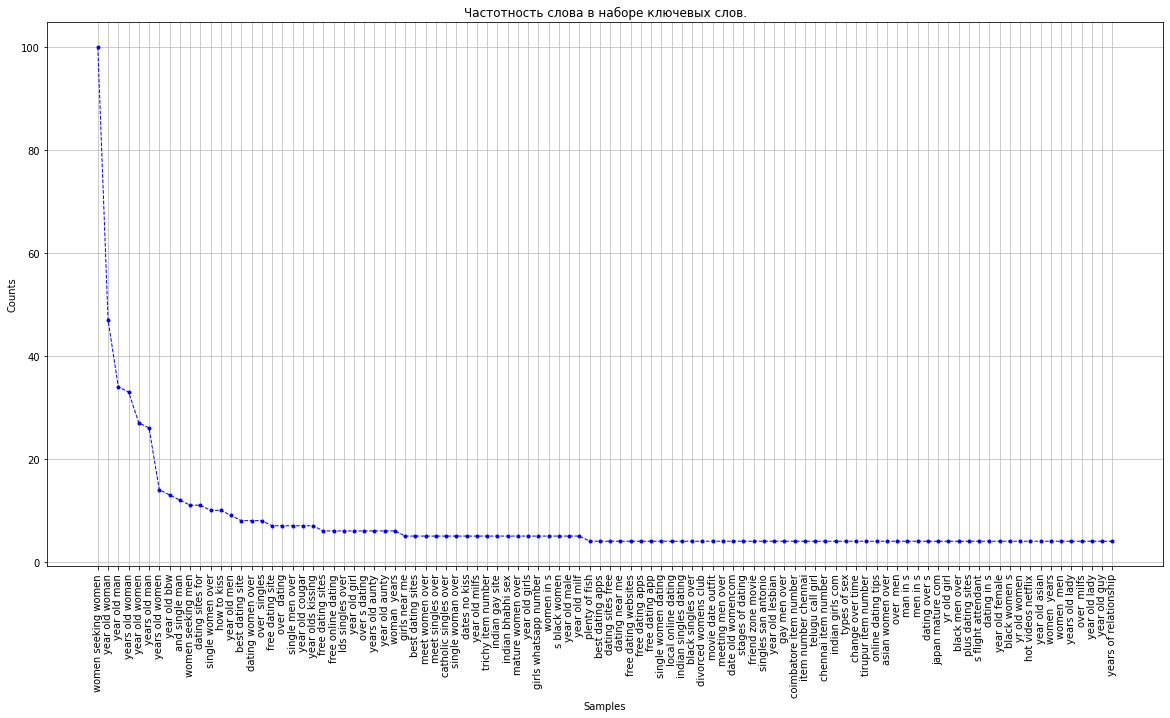

In [231]:
# Смотрим визуализацию
plt.figure(figsize = (20, 10))
plt.xlabel('Cлово в наборе данных')
plt.ylabel('Частота в наборе данных')
plt.title('Частотность слова в наборе ключевых слов.')
freqDist_ofthreeWords.plot(100, cumulative = False, marker = 'o', linestyle = 'dashed', color = 'blue', linewidth = 1, markersize = 3, animated = True)
plt.show();

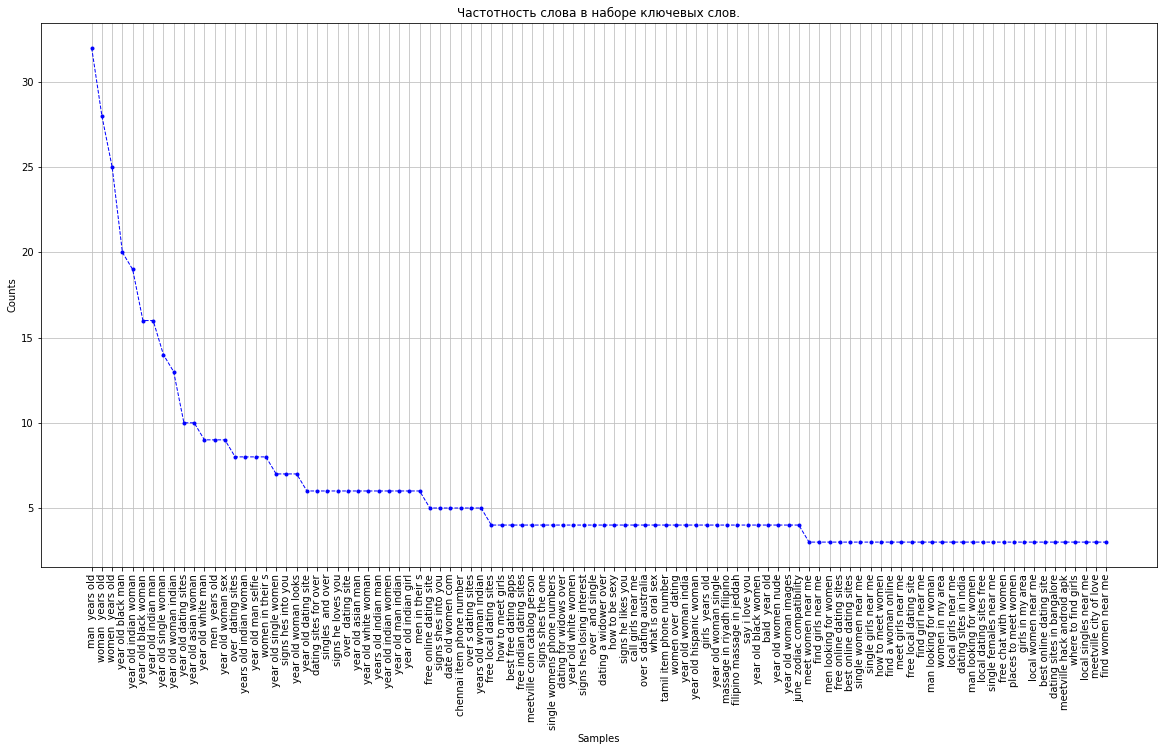

In [232]:
# Смотрим визуализацию
plt.figure(figsize = (20, 10))
plt.xlabel('Cлово в наборе данных')
plt.ylabel('Частота в наборе данных')
plt.title('Частотность слова в наборе ключевых слов.')
freqDist_offourWords.plot(100, cumulative = False, marker = 'o', linestyle = 'dashed', color = 'blue', linewidth = 1, markersize = 3, animated = True)
plt.show();

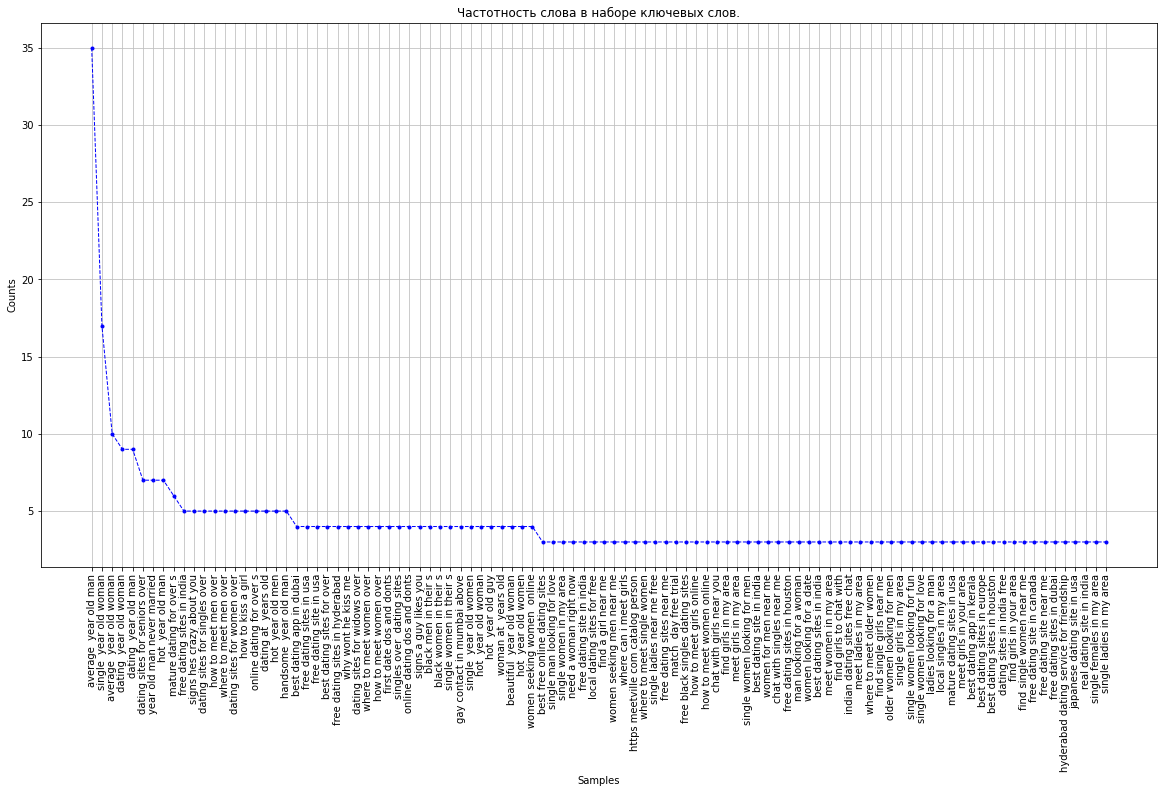

In [233]:
# Смотрим визуализацию
plt.figure(figsize = (20, 10))
plt.xlabel('Cлово в наборе данных')
plt.ylabel('Частота в наборе данных')
plt.title('Частотность слова в наборе ключевых слов.')
freqDist_offiveWords.plot(100, cumulative = False, marker = 'o', linestyle = 'dashed', color = 'blue', linewidth = 1, markersize = 3, animated = True)
plt.show();

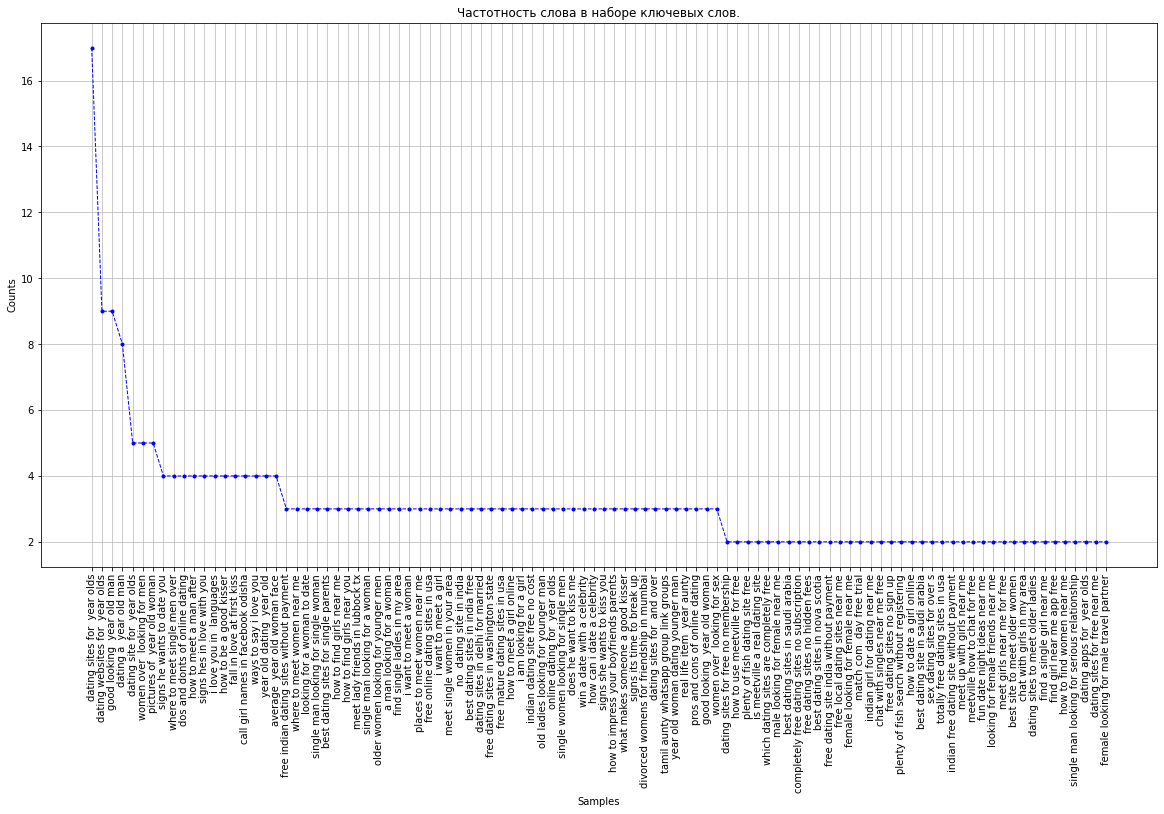

In [234]:
# Смотрим визуализацию
plt.figure(figsize = (20, 10))
plt.xlabel('Cлово в наборе данных')
plt.ylabel('Частота в наборе данных')
plt.title('Частотность слова в наборе ключевых слов.')
freqDist_ofsixWords.plot(100, cumulative = False, marker = 'o', linestyle = 'dashed', color = 'blue', linewidth = 1, markersize = 3, animated = True)
plt.show();

In [235]:
freq_SentDist.most_common(10)

[('kiss', 209),
 ('sex', 191),
 ('dating', 168),
 ('women seeking women', 102),
 ('dating sites', 99),
 ('women', 94),
 ('first kiss', 88),
 ('kiss first date', 87),
 ('know relationship', 79),
 ('love', 75)]

In [78]:
# Экспортируем сгенеренные результаты в папку (прежде надо смонтировать connection с гугл-диском)
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [236]:
export_data = [freq_dist, freqDist_oftwoWords, freqDist_ofthreeWords, freqDist_offourWords, freqDist_offiveWords, freqDist_ofsixWords]

# Экспортируем полученные результаты по частотности в файлы csv для передачи отделам
def to_export(data_to_export):
  for num, document in enumerate(data_to_export):
    export_doc = pd.DataFrame(document.most_common(100), columns = ['keywords', 'frequency']).sort_values(by = ['frequency'], ascending = False)
    export_doc.to_csv('drive/My Drive/Colab Notebooks/KeywordsAnalytics_KeywordsModelling/Exported_keywordsFrequency_UniqueSet/'+ str(num) + '_documentFreqency.csv', index = False)

In [237]:
# Экспортируем данные в папку
# Данные представляют с собой наиболее часто используемые однословники, двух... и ...шестисловники в наборе данных
# То есть, те keywords которые были использованны в процессе работы чаще всего.
to_export(export_data)

### **Формирование массива признаков ключевых слов, по частотности.Классификация результатов. Уникальное вхождение и не уникальное вхождение частотности в keywords.**

In [238]:
# В случае классификации текста необходимо сконвертировать данный текст на некоторое количество векторов.
# В качестве признаков будем использовать наиболее частов встречающиеся слова, которые мы нашли в массиве tokenized_words
# Будем использовать Топ-50 слов с данного массива в результате получится матрица вида Nx50
# Какие массивы будут использоваться: freq_dist, tokenized_words and all keywords
bag_words = sorted(freq_dist.items(), key = lambda x: x[1], reverse = True)
print(bag_words)

[('dating', 56280), ('sex', 31085), ('girls', 23847), ('girl', 22224), ('women', 18534), ('call', 14973), ('men', 11591), ('sites', 11420), ('online', 11009), ('indian', 10772), ('gay', 10570), ('singles', 10337), ('number', 10179), ('kiss', 8918), ('free', 8678), ('aunty', 8498), ('site', 8416), ('single', 8246), ('date', 8211), ('love', 7697), ('man', 7514), ('woman', 7511), ('tamil', 6682), ('meet', 6618), ('chat', 6534), ('sexy', 5825), ('hot', 5447), ('old', 5092), ('meetville', 5073), ('mature', 4546), ('romantic', 4447), ('seeking', 4444), ('best', 4424), ('looking', 4368), ('first', 4320), ('lesbian', 4082), ('kissing', 3974), ('app', 3624), ('couple', 3617), ('photo', 3536), ('escort', 3477), ('near', 3446), ('escorts', 3418), ('relationship', 3405), ('black', 3391), ('india', 3313), ('bbw', 3228), ('ladies', 3192), ('images', 3150), ('phone', 3097), ('asian', 3096), ('photos', 3054), ('female', 2846), ('video', 2833), ('kerala', 2826), ('local', 2821), ('service', 2791), ('ba

In [239]:
# Так как тип данных "словарное множество" то извлечем Топ-100 слов которые наиболее часто встречаются в запросах ключевых слов
# частотность опустим так как не совсем важна для последующих операций
bag_words = [keyword[0] for keyword in bag_words[:100]]

In [240]:
# Дабл-чек на проверку, действительно ли Топ-100 ключевых слов
# bag_words.remove('')
print(len(bag_words))

100


In [85]:
adwords_data.rename(columns = {'Matched search term' : 'keywords', 'Impressions' : 'impressions', 'Clicks' : 'clicks'}, inplace = True)
gsc_data.rename(columns = {'Search query' : 'keywords', 'Impressions' : 'impressions', 'Clicks' : 'clicks'}, inplace = True)

In [86]:
# Создаем проверяющий массив на сбор статистики по кликам и по impressions для нашего массива слов
checking_array = [adwords_data, gsc_data]
checking_data = pd.concat(checking_array, ignore_index = True, axis = 0)

In [87]:
checking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405459 entries, 0 to 405458
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   keywords     405458 non-null  object
 1   impressions  405459 non-null  int64 
 2   clicks       405459 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.3+ MB


In [88]:
# Предобработка данных для checking data

# удаляем пустые значения
checking_data.dropna(inplace=True)

# Перевод всех данных в наборе в формат текста для того чтобы избежать ошибок связанных с типом данных
checking_data['keywords'] = checking_data['keywords'].astype(str)

# Переведем все слова находящиеся в колонке в нижний регистр
checking_data['keywords'] = checking_data['keywords'].str.lower()

# Если в наборе keywords присутствует пунктуация от нее тоже необходимо будет избавиться для последующей работы с текстом
checking_data['keywords'] = checking_data['keywords'].str.replace('[^\w\s]', '')

# Теперь удаляем все смайлики и прочую non-ASCII текст в наборе данных
checking_data['keywords'] = checking_data['keywords'].apply(emoji)

# Вызываем вышестоящую функцию для удаления эмотиконов
checking_data['keywords'] = checking_data['keywords'].apply(remove_emoticons)

# Вызываем вышеуказанную функцию и удаляем адреса веб-сайтов
checking_data['keywords'] = checking_data['keywords'].apply(remove_urls)

# Избавляемся от цифр и символов в наборе
checking_data['keywords'] = checking_data['keywords'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
checking_data['keywords'] = checking_data['keywords'].apply(lambda x: x.translate(str.maketrans('', '', '1234567890')))

# фильтр строк на пустые символы
checking_data['keywords'].str.replace(' ', '')
checking_data.keywords = checking_data.keywords.str.strip()

#  Используем для простановки меток 
# Нейросеть которая распознаёт язык lid.176.bin
pretrained_model = '/tmp/lid.176.bin'
model = fasttext.load_model(pretrained_model)

# Распознавание языков
langs = []
for sentence in checking_data['keywords']:
  lang = model.predict(sentence)[0]
  langs.append(str(lang)[11:13])

checking_data['language'] = langs

In [89]:
checking_data.language.value_counts(normalize = True)[:10]

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


en    0.802004
it    0.027204
fr    0.024143
es    0.023544
de    0.023512
pt    0.007520
nl    0.007461
fi    0.006704
pl    0.005488
id    0.005174
Name: language, dtype: float64

In [90]:
# Избавляемся от языка, который не EN
checking_data = checking_data[checking_data['language'] == 'en']
checking_data.language.value_counts()

en    325179
Name: language, dtype: int64

In [91]:
# избавляемся от пустых строк
checking_data = checking_data[checking_data['keywords'] != '']

In [92]:
# удаляем столбец language так как он больше не актуален
del(checking_data['language'])

In [93]:
# Переводим обратно в строку
checking_data['keywords'] = checking_data['keywords'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))

# Проверяем
checking_data.head() 

,keywords,impressions,clicks
0,meetville,264391,156690
1,zoosk,59585,1493
3,dating sites,36092,4205
4,plenty fish,25490,1401
5,online dating,21411,954


In [243]:
# Это таблица которая показывает содержание на основании частотности всех слов в bag_words
checking_data[checking_data.keywords.str.contains('|'.join(bag_words))].sort_values(by = 'clicks', ascending = False)[:10]

,keywords,impressions,clicks
0,meetville,264391,156690
21172,girls near,299082,50588
21174,meetville,154613,33590
21177,call girls near,138353,21513
21186,call girl near,85663,15311
21179,indian singles,126417,13957
21184,call girls mysore,89313,10194
21188,mysore call girls,80724,8115
21196,call girls coimbatore,64464,7951
21199,call girls vijayawada,58837,7948


In [244]:
# Создаем аггрегированные данные по массиву частотности однословок
a = []
for b in bag_words:
  a.append((b, checking_data[checking_data['keywords'].str.contains(b)][['impressions', 'clicks']].sum().values[0], 
               checking_data[checking_data['keywords'].str.contains(b)][['impressions', 'clicks']].sum().values[1]))

# набор агрегированных данные
groupedOne_df = pd.DataFrame.from_records(a, columns = ['keywords', 'impressions', 'clicks'])
groupedOne_df.head()

,keywords,impressions,clicks
0,dating,2980544,335716
1,sex,1448782,234933
2,girls,4523111,654593
3,girl,7400633,1084941
4,women,2380185,196865


In [245]:
# группируем однословные частоты в набор и готово
groupedOne_df = groupedOne_df.sort_values(by = 'clicks', ascending = False)[:100]

In [246]:
# То, что мы проводили выше с однословными предложениями теперь необходимо провести с двухсловными наборами 
# Так же получить количество кликов и количество impressions для набора данных
twoBag_words = sorted(freqDist_oftwoWords.most_common(100), key = lambda x: x[1], reverse = True)
print(twoBag_words)

[('years old', 26), ('dating site', 23), ('dating sites', 22), ('tamil sex', 14), ('s women', 11), ('women age', 10), ('online dating', 9), ('single women', 9), ('singles over', 9), ('dating over', 9), ('mature women', 9), ('local dates', 8), ('singles dating', 8), ('dating apps', 8), ('first kiss', 8), ('aunty sex', 8), ('s men', 8), ('years aunty', 8), ('milfs over', 8), ('bbw mature', 7), ('dating etiquette', 7), ('call girl', 7), ('age aunty', 7), ('over s', 7), ('women over', 7), ('year old', 7), ('sex after', 7), ('meetville com', 6), ('local dating', 6), ('single woman', 6), ('black bbw', 6), ('call girls', 6), ('sex girls', 6), ('kerala sex', 6), ('tamil aunty', 6), ('indian girl', 6), ('gay com', 6), ('plus dating', 6), ('women at', 6), ('milf over', 6), ('sex over', 6), ('year aunty', 6), ('sex at', 6), ('chat rooms', 5), ('dating websites', 5), ('dating service', 5), ('dating singles', 5), ('free dating', 5), ('female doctor', 5), ('romantic kiss', 5), ('bbw ebony', 5), ('as

In [247]:
# создаём набор слов для "двухсловок"
# Так как тип данных "словарное множество" то извлечем Топ-100 слов которые наиболее часто встречаются в запросах ключевых слов
twoBag_words = [keyword[0] for keyword in twoBag_words]

In [248]:
# Создаем аггрегированные данные 
a = []
for b in twoBag_words:
  b1, b2 = b.split(' ')
  a.append((b, checking_data[checking_data['keywords'].str.contains(b1) | checking_data['keywords'].str.contains(b2)][['impressions', 'clicks']].sum().values[0], 
               checking_data[checking_data['keywords'].str.contains(b1) | checking_data['keywords'].str.contains(b2)][['impressions', 'clicks']].sum().values[1]))

# набор агрегированных данные
groupedTwo_df = pd.DataFrame.from_records(a, columns = ['keywords', 'impressions', 'clicks'])
groupedTwo_df.head()

,keywords,impressions,clicks
0,years old,362470,26331
1,dating site,3057088,346166
2,dating sites,3009615,340699
3,tamil sex,1865437,268184
4,s women,15716995,1635530


In [249]:
# группируем однословные частоты в набор и готово
groupedTwo_df = groupedTwo_df.sort_values(by = 'clicks', ascending = False)
groupedTwo_df.head()

,keywords,impressions,clicks
65,s dating,15936158,1701241
16,s men,15877241,1643441
4,s women,15716995,1635530
67,s woman,15114898,1591658
23,over s,14866942,1570124


In [250]:
# создаём набор слов для "трехсловок"
# Так как тип данных "словарное множество" то извлечем Топ-100 слов которые наиболее часто встречаются в запросах ключевых слов
threeBag_words = sorted(freqDist_ofthreeWords.most_common(100), key = lambda x: x[1], reverse = True)

# Переводим в массив
threeBag_words = [keyword[0] for keyword in threeBag_words]

# Check
threeBag_words[:5]

['women seeking women',
 'year old woman',
 'year old man',
 'years old woman',
 'year old women']

In [251]:
# Создаем аггрегированные данные 
a = []
for b in threeBag_words:
  b1, b2, b3 = b.split(' ')
  a.append((b, checking_data[checking_data['keywords'].str.contains(b1) | checking_data['keywords'].str.contains(b2) | checking_data['keywords'].str.contains(b3)][['impressions', 'clicks']].sum().values[0], 
               checking_data[checking_data['keywords'].str.contains(b1) | checking_data['keywords'].str.contains(b2) | checking_data['keywords'].str.contains(b3)][['impressions', 'clicks']].sum().values[1],
))

# набор агрегированных данные
groupedThree_df = pd.DataFrame.from_records(a, columns = ['keywords', 'impressions', 'clicks'])
groupedThree_df.head()

,keywords,impressions,clicks
0,women seeking women,2605638,209415
1,year old woman,711435,57382
2,year old man,1668743,110467
3,years old woman,707668,57350
4,year old women,2634984,216681


In [252]:
# группируем однословные частоты в набор и готово
groupedThree_df = groupedThree_df.sort_values(by = 'clicks', ascending = False)
groupedThree_df.head()

,keywords,impressions,clicks
16,over singles,22369520,2477447
18,over dating,22369520,2477447
96,over milfs,22369520,2477447
94,women men,22369520,2477447
29,woman years,22369520,2477447


In [253]:
# создаём набор слов для "четырехсловок"
# Так как тип данных "словарное множество" то извлечем Топ-100 слов которые наиболее часто встречаются в запросах ключевых слов
fourBag_words = sorted(freqDist_offourWords.most_common(100), key = lambda x: x[1], reverse = True)

# Переводим в массив
fourBag_words = [keyword[0] for keyword in fourBag_words]

# Check
fourBag_words[:5]

['man  years old',
 'woman  years old',
 'women  years old',
 'year old black man',
 'year old indian woman']

In [254]:
# Создаем аггрегированные данные 
a = []
for b in fourBag_words:
  b1, b2, b3, b4 = b.split(' ')
  a.append((b, checking_data[checking_data['keywords'].str.contains(b1) | checking_data['keywords'].str.contains(b2) | checking_data['keywords'].str.contains(b3) | checking_data['keywords'].str.contains(b4)][['impressions', 'clicks']].sum().values[0], 
               checking_data[checking_data['keywords'].str.contains(b1) | checking_data['keywords'].str.contains(b2) | checking_data['keywords'].str.contains(b3) | checking_data['keywords'].str.contains(b4)][['impressions', 'clicks']].sum().values[1]))

# набор агрегированных данные
groupedFour_df = pd.DataFrame.from_records(a, columns = ['keywords', 'impressions', 'clicks'])
groupedFour_df.head()

,keywords,impressions,clicks
0,man years old,22369520,2477447
1,woman years old,22369520,2477447
2,women years old,22369520,2477447
3,year old black man,1874228,115401
4,year old indian woman,1546667,135533


In [255]:
groupedFour_df = groupedFour_df.sort_values(by = 'clicks', ascending = False)
groupedFour_df.head()

,keywords,impressions,clicks
0,man years old,22369520,2477447
14,over dating sites,22369520,2477447
2,women years old,22369520,2477447
69,june zodiac compatibility,22369520,2477447
66,bald year old,22369520,2477447


In [256]:
# создаём набор слов для "пятисловок"
# Так как тип данных "словарное множество" то извлечем Топ-100 слов которые наиболее часто встречаются в запросах ключевых слов
fiveBag_words = sorted(freqDist_offiveWords.most_common(100), key = lambda x: x[1], reverse = True)

# Переводим в массив
fiveBag_words = [keyword[0] for keyword in fiveBag_words]

# Check
fiveBag_words[:5]

['average  year old man',
 'single  year old woman',
 'average  year old woman',
 'dating  year old woman',
 'dating  year old man']

In [257]:
# Создаем аггрегированные данные 
a = []
for b in fiveBag_words:
  b1, b2, b3, b4, b5 = b.split(' ')
  a.append((b, checking_data[checking_data['keywords'].str.contains(b1) | checking_data['keywords'].str.contains(b2) | checking_data['keywords'].str.contains(b3) | checking_data['keywords'].str.contains(b4) | checking_data['keywords'].str.contains(b5)][['impressions', 'clicks']].sum().values[0], 
               checking_data[checking_data['keywords'].str.contains(b1) | checking_data['keywords'].str.contains(b2) | checking_data['keywords'].str.contains(b3) | checking_data['keywords'].str.contains(b4) | checking_data['keywords'].str.contains(b5)][['impressions', 'clicks']].sum().values[1]))

# набор агрегированных данные
groupedFive_df = pd.DataFrame.from_records(a, columns = ['keywords', 'impressions', 'clicks'])
groupedFive_df.head()

,keywords,impressions,clicks
0,average year old man,22369520,2477447
1,single year old woman,22369520,2477447
2,average year old woman,22369520,2477447
3,dating year old woman,22369520,2477447
4,dating year old man,22369520,2477447


In [258]:
groupedFive_df = groupedFive_df.sort_values(by = 'clicks', ascending = False)
groupedFive_df.head()

,keywords,impressions,clicks
0,average year old man,22369520,2477447
18,hot year old men,22369520,2477447
19,handsome year old man,22369520,2477447
30,singles over dating sites,22369520,2477447
37,single year old women,22369520,2477447


In [259]:
# создаём набор слов для "шестисловок"
# Так как тип данных "словарное множество" то извлечем Топ-100 слов которые наиболее часто встречаются в запросах ключевых слов
sixBag_words = sorted(freqDist_ofsixWords.most_common(100), key = lambda x: x[1], reverse = True)

# Переводим в массив
sixBag_words = [keyword[0] for keyword in sixBag_words]

# Check
sixBag_words[:5]

['dating sites for  year olds',
 'dating websites for  year olds',
 'good looking  year old man',
 'dating a  year old man',
 'dating site for  year olds']

In [260]:
# Создаем аггрегированные данные 
a = []
for b in sixBag_words:
  b1, b2, b3, b4, b5, b6 = b.split(' ')
  a.append((b, checking_data[checking_data['keywords'].str.contains(b1) | checking_data['keywords'].str.contains(b2) | checking_data['keywords'].str.contains(b3) | checking_data['keywords'].str.contains(b4) | checking_data['keywords'].str.contains(b5) | checking_data['keywords'].str.contains(b6)][['impressions', 'clicks']].sum().values[0], 
               checking_data[checking_data['keywords'].str.contains(b1) | checking_data['keywords'].str.contains(b2) | checking_data['keywords'].str.contains(b3) | checking_data['keywords'].str.contains(b4) | checking_data['keywords'].str.contains(b5) | checking_data['keywords'].str.contains(b6)][['impressions', 'clicks']].sum().values[1]))

# набор агрегированных данные
groupedSix_df = pd.DataFrame.from_records(a, columns = ['keywords', 'impressions', 'clicks'])
groupedSix_df.head()

,keywords,impressions,clicks
0,dating sites for year olds,22369520,2477447
1,dating websites for year olds,22369520,2477447
2,good looking year old man,22369520,2477447
3,dating a year old man,22369520,2477447
4,dating site for year olds,22369520,2477447


In [261]:
groupedSix_df = groupedSix_df.sort_values(by = 'clicks', ascending = False)
groupedSix_df.head()

,keywords,impressions,clicks
0,dating sites for year olds,22369520,2477447
12,i love you in languages,22369520,2477447
45,online dating for year olds,22369520,2477447
1,dating websites for year olds,22369520,2477447
55,dating sites for and over,22369520,2477447


In [264]:
export_DocGroup = [groupedOne_df, groupedTwo_df, groupedThree_df, groupedFour_df, groupedFive_df, groupedSix_df]

# Экспортируем полученные результаты по частотности в файлы csv для передачи отделам
def to_exportDocs(data_to_export):
  for num, document in enumerate(data_to_export):
    document.to_csv('drive/My Drive/Colab Notebooks/KeywordsAnalytics_KeywordsModelling/Exported_GroupedDocuments_NonUniqueSet/'+ str(num) + '_Groupeddocument.csv', index = False)

In [265]:
# Экспортируем данные в папку
# Данные представляют с собой наиболее часто используемые однословники, двух... и ...шестисловники в наборе данных
# То есть, те keywords которые были использованны в процессе работы чаще всего.
to_exportDocs(export_DocGroup)

In [266]:
# Проводим аналогичный процесс только все данные теперь будут inclusive то есть уникальные сеты

# Создаем аггрегированные данные по массиву частотности однословок
a = []
for b in bag_words:
  a.append((b, checking_data[checking_data['keywords'].str.contains(b)][['impressions', 'clicks']].sum().values[0], 
               checking_data[checking_data['keywords'].str.contains(b)][['impressions', 'clicks']].sum().values[1]))

# набор агрегированных данные
groupedUniqueOne_df = pd.DataFrame.from_records(a, columns = ['keywords', 'impressions', 'clicks'])

# группируем однословные частоты в набор и готово
groupedUniqueOne_df = groupedUniqueOne_df.sort_values(by = 'clicks', ascending = False)[:100]
groupedUniqueOne_df.head()

,keywords,impressions,clicks
3,girl,7400633,1084941
5,call,4317660,659013
2,girls,4523111,654593
0,dating,2980544,335716
12,number,1668278,285024


In [267]:
# Создаем аггрегированные данные 
a = []
for b in twoBag_words:
  b1, b2 = b.split(' ')
  a.append((b, checking_data[checking_data['keywords'].str.contains(b1) & checking_data['keywords'].str.contains(b2)][['impressions', 'clicks']].sum().values[0], 
               checking_data[checking_data['keywords'].str.contains(b1) & checking_data['keywords'].str.contains(b2)][['impressions', 'clicks']].sum().values[1]))

# набор агрегированных данные
groupedUniqueTwo_df = pd.DataFrame.from_records(a, columns = ['keywords', 'impressions', 'clicks'])
groupedUniqueTwo_df.head()

# группируем однословные частоты в набор и готово
groupedUniqueTwo_df = groupedUniqueTwo_df.sort_values(by = 'clicks', ascending = False)
groupedUniqueTwo_df.head()

,keywords,impressions,clicks
21,call girl,4206814,637702
31,call girls,2476230,357004
62,dating at,2980544,335716
65,s dating,1909732,204451
16,s men,1854552,145011


In [268]:
# Создаем аггрегированные данные 
a = []
for b in threeBag_words:
  b1, b2, b3 = b.split(' ')
  a.append((b, checking_data[checking_data['keywords'].str.contains(b1) & checking_data['keywords'].str.contains(b2) & checking_data['keywords'].str.contains(b3)][['impressions', 'clicks']].sum().values[0], 
               checking_data[checking_data['keywords'].str.contains(b1) & checking_data['keywords'].str.contains(b2) & checking_data['keywords'].str.contains(b3)][['impressions', 'clicks']].sum().values[1]))

# набор агрегированных данные
groupedUniqueThree_df = pd.DataFrame.from_records(a, columns = ['keywords', 'impressions', 'clicks'])

# группируем однословные частоты в набор и готово
groupedUniqueThree_df = groupedUniqueThree_df.sort_values(by = 'clicks', ascending = False)
groupedUniqueThree_df.head()


,keywords,impressions,clicks
87,dating in s,1909732,204451
94,women men,2380185,196865
80,men in s,1514244,109255
44,women in s,1250042,97086
0,women seeking women,835635,58129


In [269]:
# Создаем аггрегированные данные 
a = []
for b in fourBag_words:
  b1, b2, b3, b4 = b.split(' ')
  a.append((b, checking_data[checking_data['keywords'].str.contains(b1) & checking_data['keywords'].str.contains(b2) & checking_data['keywords'].str.contains(b3) & checking_data['keywords'].str.contains(b4)][['impressions', 'clicks']].sum().values[0], 
               checking_data[checking_data['keywords'].str.contains(b1) & checking_data['keywords'].str.contains(b2) & checking_data['keywords'].str.contains(b3) & checking_data['keywords'].str.contains(b4)][['impressions', 'clicks']].sum().values[1]))

# набор агрегированных данные
groupedUniqueFour_df = pd.DataFrame.from_records(a, columns = ['keywords', 'impressions', 'clicks'])

groupedUniqueFour_df = groupedUniqueFour_df.sort_values(by = 'clicks', ascending = False)
groupedUniqueFour_df.head()

,keywords,impressions,clicks
85,dating sites in india,117404,10497
75,single women near me,60308,6569
36,chennai item phone number,36358,4791
94,dating sites in bangalore,20810,3570
70,meet women near me,33051,3555


In [270]:
# Создаем аггрегированные данные 
a = []
for b in fiveBag_words:
  b1, b2, b3, b4, b5 = b.split(' ')
  a.append((b, checking_data[checking_data['keywords'].str.contains(b1) & checking_data['keywords'].str.contains(b2) & checking_data['keywords'].str.contains(b3) & checking_data['keywords'].str.contains(b4) & checking_data['keywords'].str.contains(b5)][['impressions', 'clicks']].sum().values[0], 
               checking_data[checking_data['keywords'].str.contains(b1) & checking_data['keywords'].str.contains(b2) & checking_data['keywords'].str.contains(b3) & checking_data['keywords'].str.contains(b4) & checking_data['keywords'].str.contains(b5)][['impressions', 'clicks']].sum().values[1]))

# набор агрегированных данные
groupedUniqueFive_df = pd.DataFrame.from_records(a, columns = ['keywords', 'impressions', 'clicks'])

groupedUniqueFive_df = groupedUniqueFive_df.sort_values(by = 'clicks', ascending = False)
groupedUniqueFive_df.head()

,keywords,impressions,clicks
48,free dating site in india,38948,2493
51,women seeking men near me,15976,1655
9,free dating sites in india,26726,1596
89,dating sites in india free,26726,1596
24,free dating sites in hyderabad,7742,1034


In [271]:
# Создаем аггрегированные данные 
a = []
for b in sixBag_words:
  b1, b2, b3, b4, b5, b6 = b.split(' ')
  a.append((b, checking_data[checking_data['keywords'].str.contains(b1) & checking_data['keywords'].str.contains(b2) & checking_data['keywords'].str.contains(b3) & checking_data['keywords'].str.contains(b4) & checking_data['keywords'].str.contains(b5) & checking_data['keywords'].str.contains(b6)][['impressions', 'clicks']].sum().values[0], 
               checking_data[checking_data['keywords'].str.contains(b1) & checking_data['keywords'].str.contains(b2) & checking_data['keywords'].str.contains(b3) & checking_data['keywords'].str.contains(b4) & checking_data['keywords'].str.contains(b5) & checking_data['keywords'].str.contains(b6)][['impressions', 'clicks']].sum().values[1]))

# набор агрегированных данные
groupedUniqueSix_df = pd.DataFrame.from_records(a, columns = ['keywords', 'impressions', 'clicks'])

groupedUniqueSix_df = groupedUniqueSix_df.sort_values(by = 'clicks', ascending = False)
groupedUniqueSix_df.head()

,keywords,impressions,clicks
17,year old dating year old,1231,98
72,free dating site india without payment,239,46
71,best dating sites in nova scotia,79,28
33,free online dating sites in usa,255,20
37,best dating sites in india free,72,20


In [272]:
export_DocGroup = [groupedUniqueOne_df, groupedUniqueTwo_df, groupedUniqueThree_df, groupedUniqueFour_df, groupedUniqueFive_df, groupedUniqueSix_df]

# Экспортируем полученные результаты по частотности в файлы csv для передачи отделам
def to_exportDocs(data_to_export):
  for num, document in enumerate(data_to_export):
    document.to_csv('drive/My Drive/Colab Notebooks/KeywordsAnalytics_KeywordsModelling/Exported_GroupedDocuments_UniqueSet/'+ str(num) + '_GroupedUniqueDocument.csv', index = False)

In [273]:
to_exportDocs(export_DocGroup)

### **Проверка частотности слов конкурентов.**

In [132]:
# Цель провести частотность по использованию keywords для конкурентов
# Использоваться будет набор данных competitorUS в котором содержится информация о часто используемых keywords конкурентами в данной сфере
competitorUS.head()

,keywords
0,interracial dating sites
1,dating sites
2,dating for seniors
3,lds singles
4,interracial dating site


In [134]:
# Фильтр данных на тип данных строковый объект
competitorUS['keywords'] = competitorUS['keywords'].astype(str)

# Первым делом переведем все слова находящиеся в колонке в нижний регистр
competitorUS['keywords'] = competitorUS['keywords'].str.lower()

# Вычисляем максимальное и минимальное словосочетание (количество слов в keyword sequence)
print('Максимальное словосочетание в наборе keywords {} слов.'.format(competitorUS['keywords'].str.split().str.len().max()))
print('Минимальное словосочетание в наборе keywords {} слово.'.format(competitorUS['keywords'].str.split().str.len().min()))

Максимальное словосочетание в наборе keywords 23 слов.
Минимальное словосочетание в наборе keywords 1 слово.


In [135]:
# Избавляемся от пунктуации
competitorUS['keywords'] = competitorUS['keywords'].str.replace('[^\w\s]', '')

# Теперь удаляем все смайлики и прочую non-ASCII текст в наборе данных
competitorUS['keywords'] = competitorUS['keywords'].apply(emoji)

In [136]:
# Проверка на пустые значения:
print('Количество пустых значений в наборе данных: {}'.format(len(competitorUS[competitorUS['keywords'] == ''])))

Количество пустых значений в наборе данных: 5


In [137]:
# Удаляем такие значения и получаем готовый набор данных с которым можно работать
competitorUS = competitorUS[competitorUS['keywords'] != '']

In [138]:
# Удаляем эмотиконы
competitorUS['keywords'] = competitorUS['keywords'].apply(remove_emoticons)

# Удаляем веб адреса если они присутствуют
competitorUS['keywords'] = competitorUS['keywords'].apply(remove_urls)

# Удаляем пунктуацию
competitorUS['keywords'] = competitorUS['keywords'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
competitorUS['keywords'] = competitorUS['keywords'].apply(lambda x: x.translate(str.maketrans('', '', '1234567890')))

# фильтр строк на пустые символы
competitorUS['keywords'].str.replace(' ', '')
competitorUS.keywords = competitorUS.keywords.str.strip()
# избавляемся от пустых строк
competitorUS = competitorUS[competitorUS['keywords'] != '']

In [139]:
# Распознавание языков
langs = []
for sentence in competitorUS['keywords']:
  lang = model.predict(sentence)[0]
  langs.append(str(lang)[11:13])

competitorUS['language'] = langs

# избавляемся от текста, который имеют языковую разметку != en
len(competitorUS[competitorUS['language'] != 'en'])

9813

In [141]:
competitorUS.language.value_counts(normalize = True)[:10]

en    0.932270
fr    0.013956
es    0.010353
de    0.008427
it    0.006943
ce    0.003058
pt    0.002913
nl    0.002216
ca    0.002188
sv    0.001698
Name: language, dtype: float64

In [142]:
# набор данных, который содержит в себе только английские слова
competitorUS = competitorUS[competitorUS['language'] == 'en']
del(competitorUS['language'])

In [144]:
# Токенизируем текстовые данные
# В предложения
competitors_tokenized_sentences = competitorUS['keywords'].tolist()

# В отдельные слова
# Тоже самое только надо воспроизвести отдельны "единичные слова" в наборе keywords в наборе данных
competitors_tokenized_words = competitorUS['keywords'].str.split(' ').explode().str.strip().tolist()

In [202]:
import nltk
nltk.download('punkt')

# Убираем стоп слова с предложений по ключевым словам
competitors_filtered_sentences = []
for sentence in competitors_tokenized_sentences:
    competitors_filtered_sentences.append(' '.join(word for word in nltk.word_tokenize(sentence) if word.lower() not in stop_words))

competitors_filtered_sentences = [word for word in competitors_filtered_sentences if word]


# Убираем стоп слова с предложений по ключевым однословкам
competitors_filtered_words = []
for sentence in competitors_tokenized_words:
    competitors_filtered_words.append(''.join(word for word in nltk.word_tokenize(sentence) if word.lower() not in stop_words))

competitors_filtered_words = [word for word in competitors_filtered_words if word]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [210]:
# Создаем массивы для ключевых слов. Для 2, 3, 4 и 5 словосочетаний.
competitors_tokenized_twoWords = []
competitors_tokenized_threeWords = []
competitors_tokenized_fourWords = []
competitors_tokenized_fiveWords = []
competitors_tokenized_sixWords = []
competitors_tokenized_sevenWords = []
competitors_tokenized_eightWords = []
competitors_tokenized_nineWords = []
competitors_tokenized_tenWords = []

# Вызываем функцию для поиска и заполняем массив
structure_keyword(competitors_filtered_sentences, 2, competitors_tokenized_twoWords)
structure_keyword(competitors_filtered_sentences, 3, competitors_tokenized_threeWords)
structure_keyword(competitors_filtered_sentences, 4, competitors_tokenized_fourWords)
structure_keyword(competitors_filtered_sentences, 5, competitors_tokenized_fiveWords)
structure_keyword(competitors_filtered_sentences, 6, competitors_tokenized_sixWords)
structure_keyword(competitors_filtered_sentences, 7, competitors_tokenized_sevenWords)
structure_keyword(competitors_filtered_sentences, 8, competitors_tokenized_eightWords)
structure_keyword(competitors_filtered_sentences, 9, competitors_tokenized_nineWords)
structure_keyword(competitors_filtered_sentences, 10, competitors_tokenized_tenWords)

print(' Объем каждого из массивов:\n 2 keywords: {}\n 3 keywords: {}\n 4 keywords: {}\n 5 keywords: {}\n 6 keywords: {}\n 7 keywords: {}\n 8 keywords: {}\n 9 keywords: {}\n 10 keywords: {}\n'.format(
                                                                                                                 len(competitors_tokenized_twoWords),
                                                                                                                 len(competitors_tokenized_threeWords),
                                                                                                                 len(competitors_tokenized_fourWords),
                                                                                                                 len(competitors_tokenized_fiveWords),
                                                                                                                 len(competitors_tokenized_sixWords),
                                                                                                                 len(competitors_tokenized_sevenWords),
                                                                                                                 len(competitors_tokenized_eightWords),
                                                                                                                 len(competitors_tokenized_nineWords),
                                                                                                                 len(competitors_tokenized_tenWords)))

 Объем каждого из массивов:
 2 keywords: 33467
 3 keywords: 57875
 4 keywords: 30208
 5 keywords: 7062
 6 keywords: 1119
 7 keywords: 197
 8 keywords: 45
 9 keywords: 19
 10 keywords: 4



In [211]:
# One word Distribution
competitors_freq_OnewordDist = FreqDist(competitors_filtered_words)

# Sentence Distribution
competitors_freq_SentDist = FreqDist(competitors_tokenized_sentences)

# Most common Two Words Distribution
competitors_freqDist_oftwoWords = FreqDist(competitors_tokenized_twoWords)

# Most common Three Words Distribution
competitors_freqDist_ofthreeWords = FreqDist(competitors_tokenized_threeWords)

# Most common Four Words Distribution
competitors_freqDist_offourWords = FreqDist(competitors_tokenized_fourWords)

# Most common Five Words Distribution
competitors_freqDist_offiveWords = FreqDist(competitors_tokenized_fiveWords)

# Most common Six Words Distribution
competitors_freqDist_ofsixWords =  FreqDist(competitors_tokenized_sixWords)

In [212]:
export_data = [competitors_freq_OnewordDist, competitors_freqDist_oftwoWords, competitors_freqDist_ofthreeWords, competitors_freqDist_offourWords, competitors_freqDist_offiveWords, competitors_freqDist_ofsixWords]

# Экспортируем полученные результаты по частотности в файлы csv для передачи отделам
def to_export(data_to_export):
  for num, document in enumerate(data_to_export):
    export_doc = pd.DataFrame(document.most_common(100), columns = ['keywords', 'frequency']).sort_values(by = ['frequency'], ascending = False)
    export_doc.to_csv('drive/My Drive/Colab Notebooks/KeywordsAnalytics_KeywordsModelling/Exported_keywordFrequency_Competitors/'+ str(num) + '_documentFreqency.csv', index = False)

In [213]:
# Export Data To Google Drive Cloud
to_export(export_data)